In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img = cv2.imread("src/img/lena.png")

def cv_show(img, name='img'):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

## 形态学

In [21]:
img_gray = cv2.imread("src/img/lena.png", cv2.IMREAD_GRAYSCALE)
img_gray.shape

(512, 512)

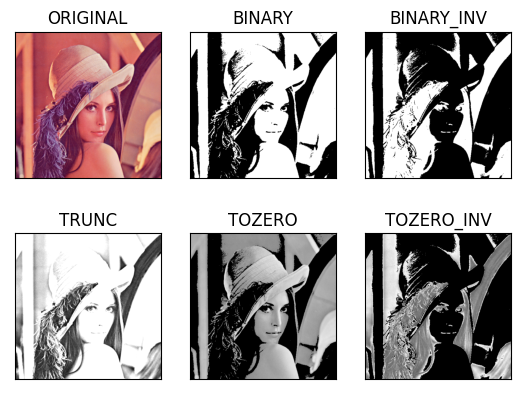

In [22]:
ret, thresh1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV)
titles = ['ORIGINAL','BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img[..., ::-1], thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray') if i > 0 else plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])


#### 图像平滑

(<AxesSubplot:title={'center':'median'}>,
 Text(0.5, 1.0, 'median'))

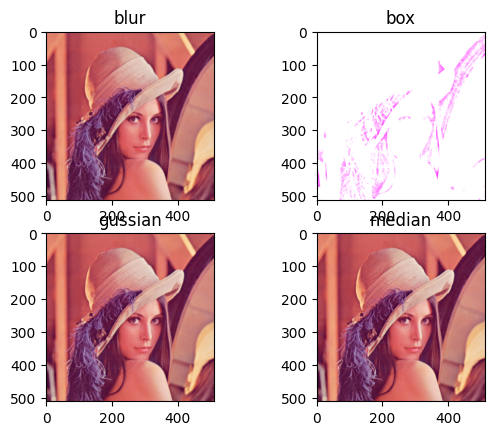

In [30]:
blur = cv2.blur(img, (3,3))
box = cv2.boxFilter(img,-1,(3,3),normalize=False)
gussian = cv2.GaussianBlur(img,(3,3),1)
median = cv2.medianBlur(img,3)
plt.imshow(blur[...,::-1])
plt.subplot(221), plt.imshow(blur[...,::-1]), plt.title('blur')
plt.subplot(222), plt.imshow(box[...,::-1]), plt.title('box')
plt.subplot(223), plt.imshow(gussian[...,::-1]), plt.title('gussian')
plt.subplot(224), plt.imshow(median[...,::-1]), plt.title('median')

In [31]:
res = np.hstack((blur, gussian, median))
cv_show(res)

#### 腐蚀

In [11]:
img = cv2.imread('src/img/nihao.JPG')

kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)

cv_show(erosion)

#### 膨胀

In [12]:
img = cv2.imread('src/img/nihao.JPG')
kernel = np.ones((3,3),np.uint8)
dilate = cv2.dilate(img, kernel, iterations=2)

cv_show(dilate)

### 开运算和闭运算

#### 开：先腐蚀再膨胀

In [13]:
img = cv2.imread('src/img/nihao.JPG')
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

cv_show(opening)

#### 闭：先膨胀再腐蚀

In [15]:
img = cv2.imread('src/img/nihao.JPG')
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

cv_show(closing)

#### 梯度运算 梯度=膨胀-腐蚀

In [16]:
img = cv2.imread('src/img/nihao.JPG')
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(img, kernel, iterations=1)
erosion = cv2.erode(img, kernel, iterations=1)

gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

cv_show(gradient)

#### 礼帽和黑帽
- 礼帽 = 原始输入 - 开运算结果
- 黑帽 = 闭运算 - 原始输入

In [18]:
img = cv2.imread('src/img/nihao.JPG')
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

cv_show(tophat)

In [19]:
img = cv2.imread('src/img/nihao.JPG')
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

cv_show(blackhat)